# Analysis only

This dataset doesn't have a target column.  All this is just fun data exploration!

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Load data

In [2]:
census = pd.read_csv("../../data/census/census_tract.csv")

print("Shape of data", census.shape)
print("Columns:", census.columns)
census.head()

Shape of data (74001, 37)
Columns Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


### Race representation by state

In [3]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for race in races:
    census[race + "_pop"] = census[race] * census.TotalPop

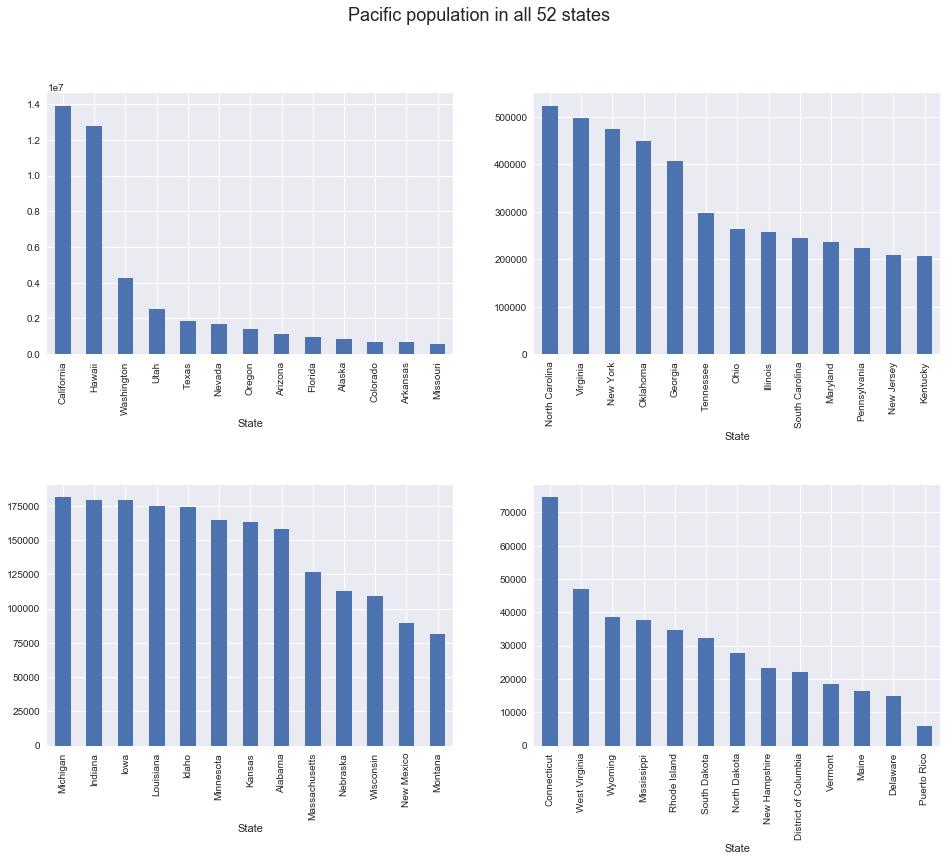

In [7]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
race = races[-1]

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("{} population in all 52 states".format(race), fontsize=18)

race_pops = census.groupby("State")[race + "_pop"].sum().sort_values(ascending=False)

race_pops.head(13).plot(kind="bar", ax=axarr[0,0])
race_pops.iloc[13:26].plot(kind="bar", ax=axarr[0,1])
race_pops.iloc[26:39].plot(kind="bar", ax=axarr[1,0])
_ = race_pops.tail(13).plot(kind="bar", ax=axarr[1,1])

### Race representation by state

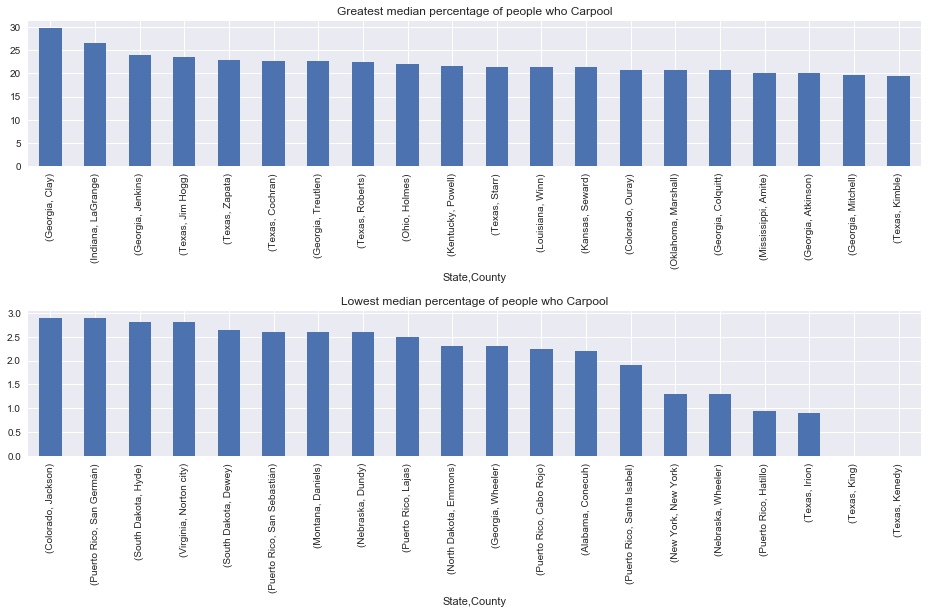

In [94]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
race = races[3]

fig, axarr = plt.subplots(2, 1, figsize=(14,6))

county_income = census.groupby(["State", "County"])["Income"].median().sort_values(ascending=False)

county_income.head(10).plot(kind="bar", title="Richest Income Counties", ax=axarr[1][0])
_ = county_income.tail(10).plot(kind="bar", title="Poorest Income Counties", ax=axarr[1][1])